In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing commonly needed libraries

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing data present.

In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
for column in data.columns:
    print(data[column].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' P

Columns Education and Education_num are define the same characteristic but Education column has string values and Education_num contains it's categorical value. Therefore, we can drop column Education.

In [8]:
data = data.drop("Education",axis=1)
data

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We can see that our data has features with categorical object data. 

Categorical features are - Workclass, Marital_status, Occupation, Relationship, Race, Sex, Native Country and Income

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [10]:
le_columns = ["Workclass", "Marital_status", "Occupation", "Race", "Sex","Relationship","Native_country","Income"]

for column in le_columns:
    data[column] = le.fit_transform(data[column])
data

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


# EDA

## Univariate Analysis

In [11]:
data.mean()

Age                   38.581634
Workclass              3.868796
Fnlwgt            189781.814373
Education_num         10.080590
Marital_status         2.611794
Occupation             6.572912
Relationship           1.446376
Race                   3.665848
Sex                    0.669195
Capital_gain        1077.615172
Capital_loss          87.306511
Hours_per_week        40.437469
Native_country        36.718796
Income                 0.240817
dtype: float64

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


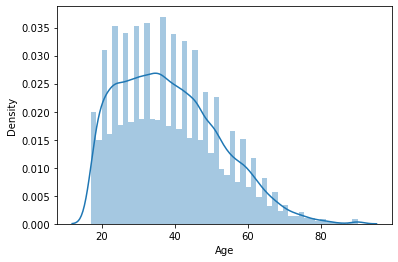

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


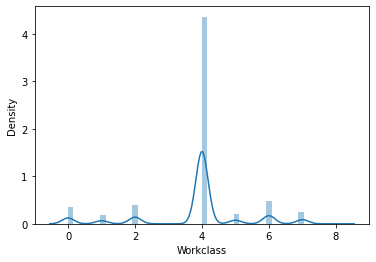

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


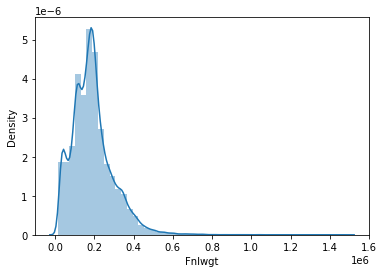

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


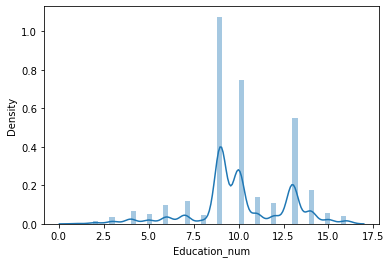

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


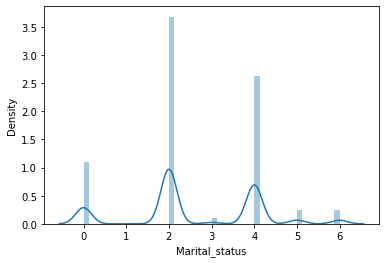

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


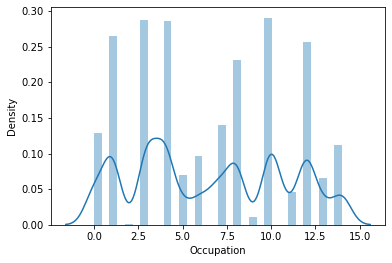

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


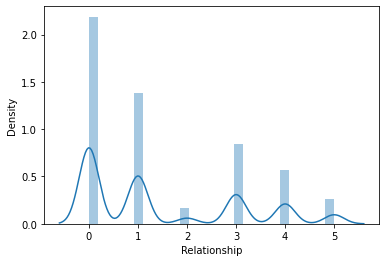

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


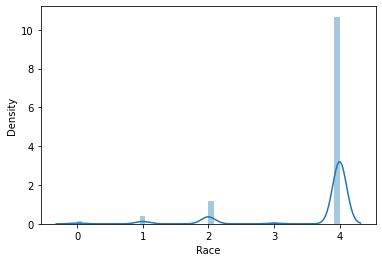

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


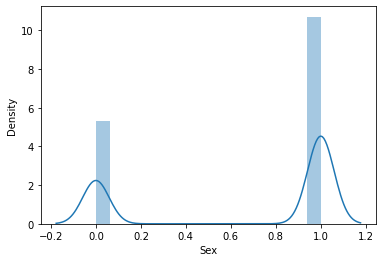

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


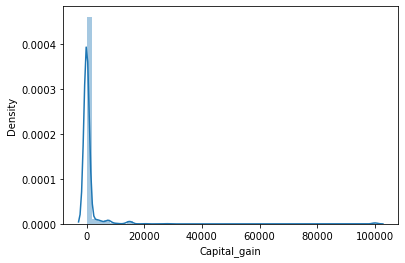

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


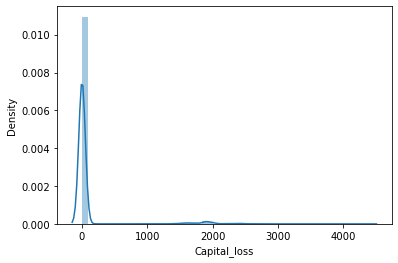

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


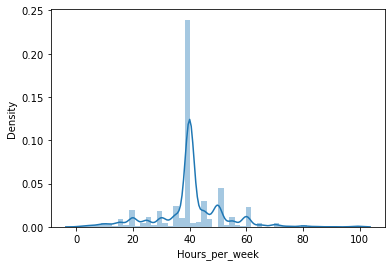

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


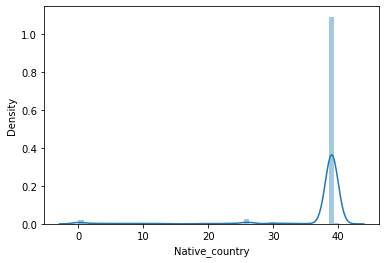

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


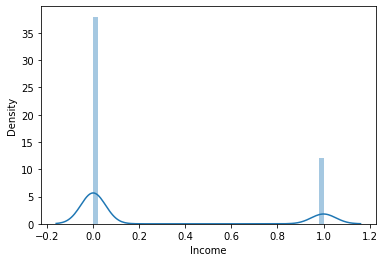

In [12]:
for column in data.columns:
    sns.distplot(data[column])
    plt.show()

From the above diagrams we observe:

    1. Columns - Age, Fnlwgt, capital_gain and capital_loss all have left skewness.
    2. All the other data features have categorical data and therefore we cannot define the skewness in them.

# Preprocessing Pipeline.

## Outliers

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


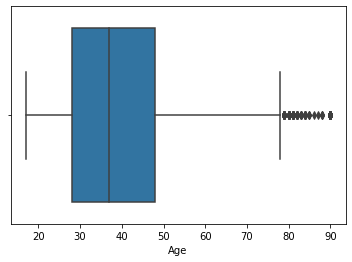

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


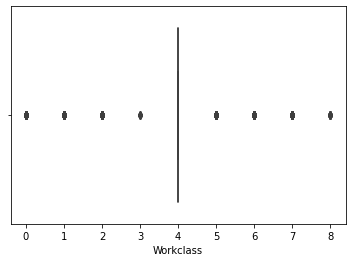

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


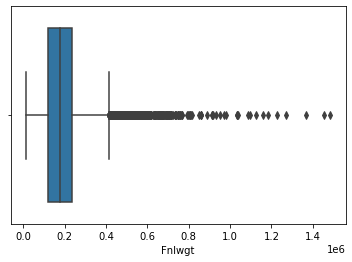

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


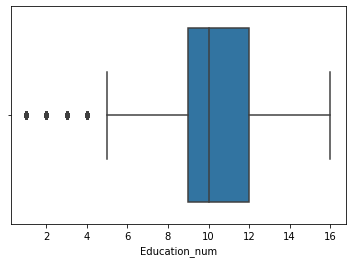

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


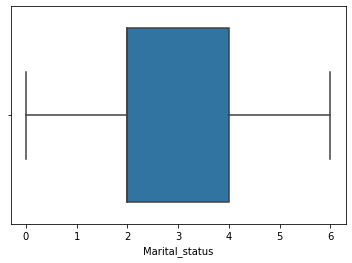

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


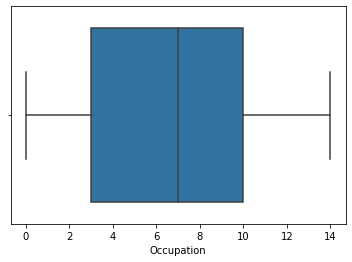

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


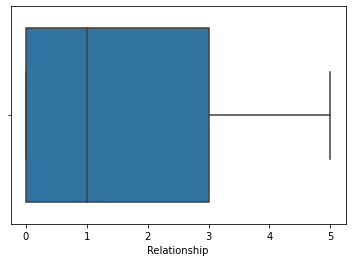

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


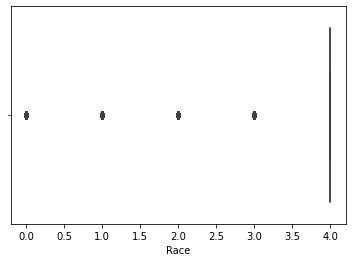

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


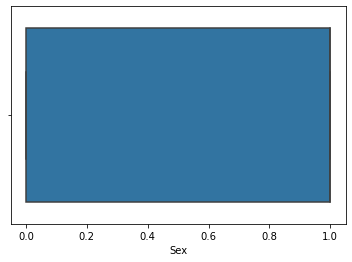

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


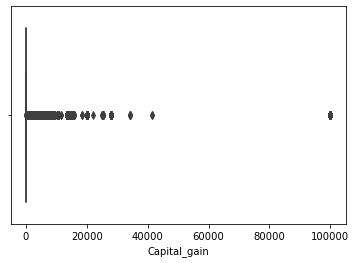

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


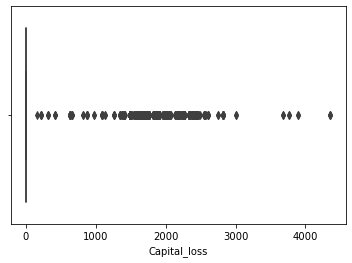

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


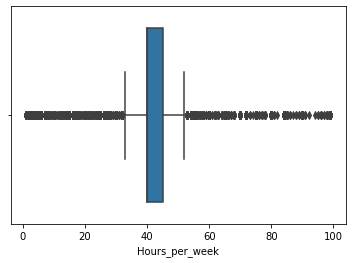

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


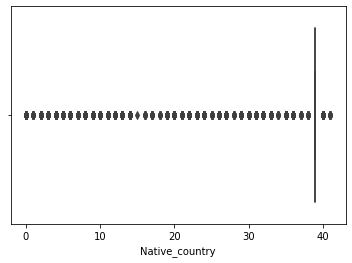

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


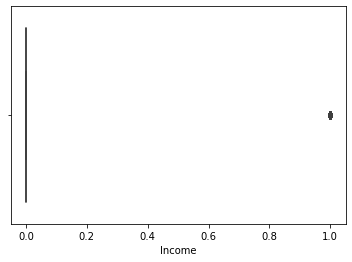

In [13]:
for column in data.columns:
    sns.boxplot(data[column])
    plt.show()

We can find outliers in columns Age, Workclass, Fnlwgt, Education_num, Race, Capital_gain, Capital_loss and hours per week.

But columns Workclass, Education_num, Race have categorical data that might be necessary for our model. 
We can remove the outliers from other columns using zscore and IQR.

## Using zscore to remove outliers

In [14]:
import scipy.stats as stats

In [15]:
column_list = ["Age", "Fnlwgt", "Race", "Capital_gain", "Capital_loss" , "Hours_per_week"]

new_data = data.copy()
for column in column_list:
    zscore = stats.zscore(new_data[column])
    for i in range(len(zscore)):
        if abs(zscore[i])>3:
            new_data = new_data.drop(i)
    new_data=new_data.reset_index(drop=True)
new_data

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28772,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
28773,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
28774,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
28775,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [16]:
(len(data)-len(new_data))/len(data)*100

11.61855036855037

After dropping the outliers we loose approximately 11% of data which is not acceptable. So we will use interquartile range method to solve this. 

## Using Interquartile Range (IQR) to remove outliers

In [17]:
from scipy import stats

In [18]:
iqr = stats.iqr(data["Age"], interpolation = 'midpoint')
iqr

20.0

In [19]:
percentile25 = data['Age'].quantile(0.25)
percentile75 = data['Age'].quantile(0.75)
percentile75

48.0

In [20]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [21]:
new_data = data[data['Age'] < upper_limit]
new_data.shape

(32394, 14)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

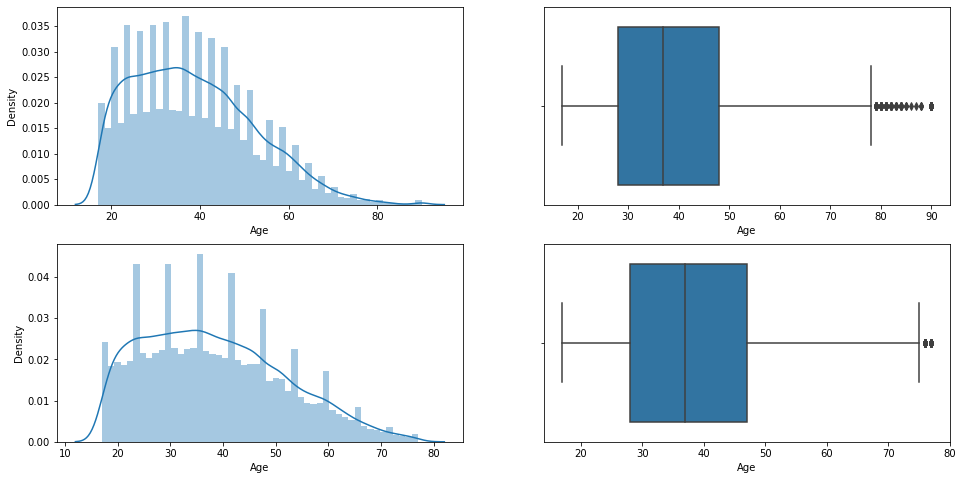

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Age'])
plt.subplot(2,2,2)
sns.boxplot(data['Age'])
plt.subplot(2,2,3)
sns.distplot(new_data['Age'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Age'])
plt.show()

In [23]:
iqr = stats.iqr(data, interpolation = 'midpoint')
iqr

32.0

In [24]:
new_data = data.copy()
new_data['Age'] = np.where(
    new_data['Age'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Age'] < lower_limit,
        lower_limit,
        new_data['Age']
    )
)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

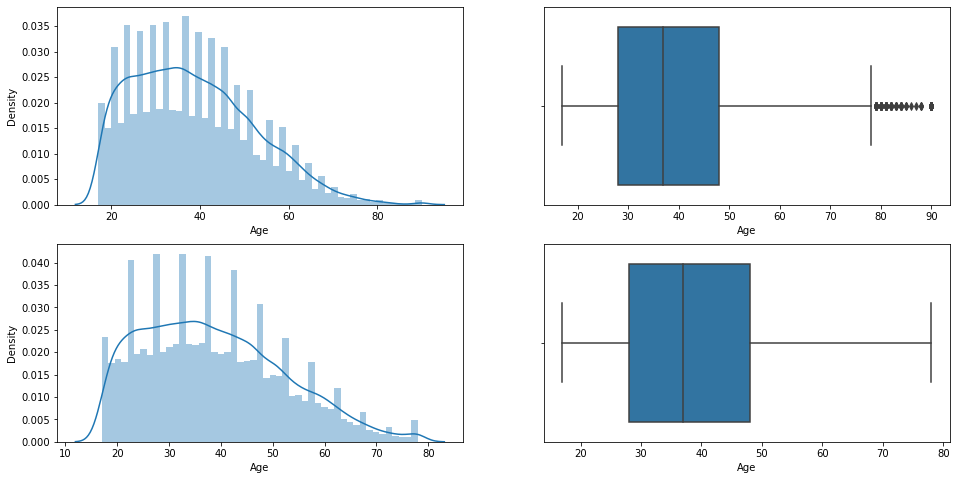

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Age'])
plt.subplot(2,2,2)
sns.boxplot(data['Age'])
plt.subplot(2,2,3)
sns.distplot(new_data['Age'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Age'])
plt.show()

In [26]:
iqr = stats.iqr(data["Fnlwgt"], interpolation = 'midpoint')

percentile25 = data['Fnlwgt'].quantile(0.25)
percentile75 = data['Fnlwgt'].quantile(0.75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [27]:
new_data['Fnlwgt'] = np.where(
    new_data['Fnlwgt'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Fnlwgt'] < lower_limit,
        lower_limit,
        new_data['Fnlwgt']
    )
)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

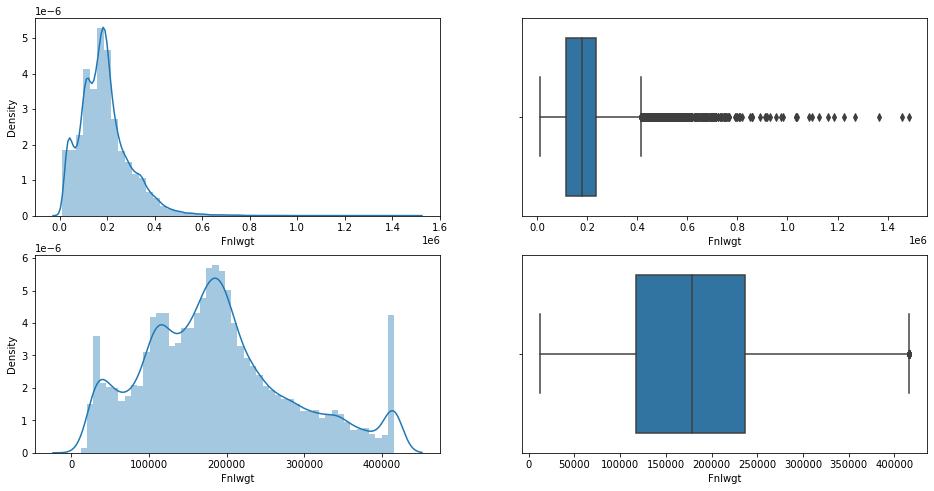

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Fnlwgt'])
plt.subplot(2,2,2)
sns.boxplot(data['Fnlwgt'])
plt.subplot(2,2,3)
sns.distplot(new_data['Fnlwgt'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Fnlwgt'])
plt.show()

In [29]:
iqr = stats.iqr(data["Hours_per_week"], interpolation = 'midpoint')

percentile25 = data['Hours_per_week'].quantile(0.25)
percentile75 = data['Hours_per_week'].quantile(0.75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [30]:
new_data['Hours_per_week'] = np.where(
    new_data['Hours_per_week'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Hours_per_week'] < lower_limit,
        lower_limit,
        new_data['Hours_per_week']
    )
)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

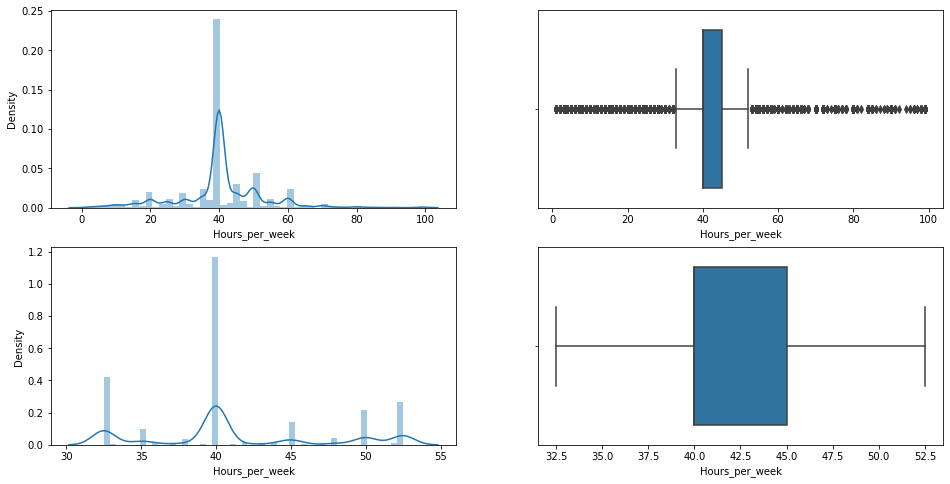

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Hours_per_week'])
plt.subplot(2,2,2)
sns.boxplot(data['Hours_per_week'])
plt.subplot(2,2,3)
sns.distplot(new_data['Hours_per_week'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Hours_per_week'])
plt.show()

In [32]:
new_data


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,6,83311.0,13,2,4,0,4,1,0,0,32.5,39,0
1,38.0,4,215646.0,9,0,6,1,4,1,0,0,40.0,39,0
2,53.0,4,234721.0,7,2,6,0,2,1,0,0,40.0,39,0
3,28.0,4,338409.0,13,2,10,5,2,0,0,0,40.0,5,0
4,37.0,4,284582.0,14,2,4,5,4,0,0,0,40.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,4,257302.0,12,2,13,5,4,0,0,0,38.0,39,0
32556,40.0,4,154374.0,9,2,7,0,4,1,0,0,40.0,39,1
32557,58.0,4,151910.0,9,6,1,4,4,0,0,0,40.0,39,0
32558,22.0,4,201490.0,9,4,1,3,4,1,0,0,32.5,39,0


## Correlation Matrix

In [33]:
corr_matrix = new_data.corr()
corr_matrix

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.004521,-0.077372,0.037045,-0.269032,-0.020527,-0.264993,0.028994,0.089343,0.078069,0.057854,0.091254,-0.001109,0.235866
Workclass,0.004521,1.000000,-0.017074,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.134820,-0.007710,0.051645
Fnlwgt,-0.077372,-0.017074,1.000000,-0.043604,0.028916,0.001592,0.006777,-0.015123,0.028608,0.001096,-0.008223,-0.025526,-0.053821,-0.008407
Education_num,0.037045,0.052015,-0.043604,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.180462,0.050831,0.335182
Marital_status,-0.269032,-0.064798,0.028916,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190316,-0.023827,-0.199295
Occupation,-0.020527,0.255004,0.001592,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.086481,-0.012532,0.075448
Relationship,-0.264993,-0.090449,0.006777,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.276752,-0.005504,-0.250924
Race,0.028994,0.049720,-0.015123,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.071110,0.137849,0.071853
Sex,0.089343,0.095942,0.028608,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.256425,-0.008125,0.215995
Capital_gain,0.078069,0.033828,0.001096,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.089895,-0.001984,0.223333


<AxesSubplot:>

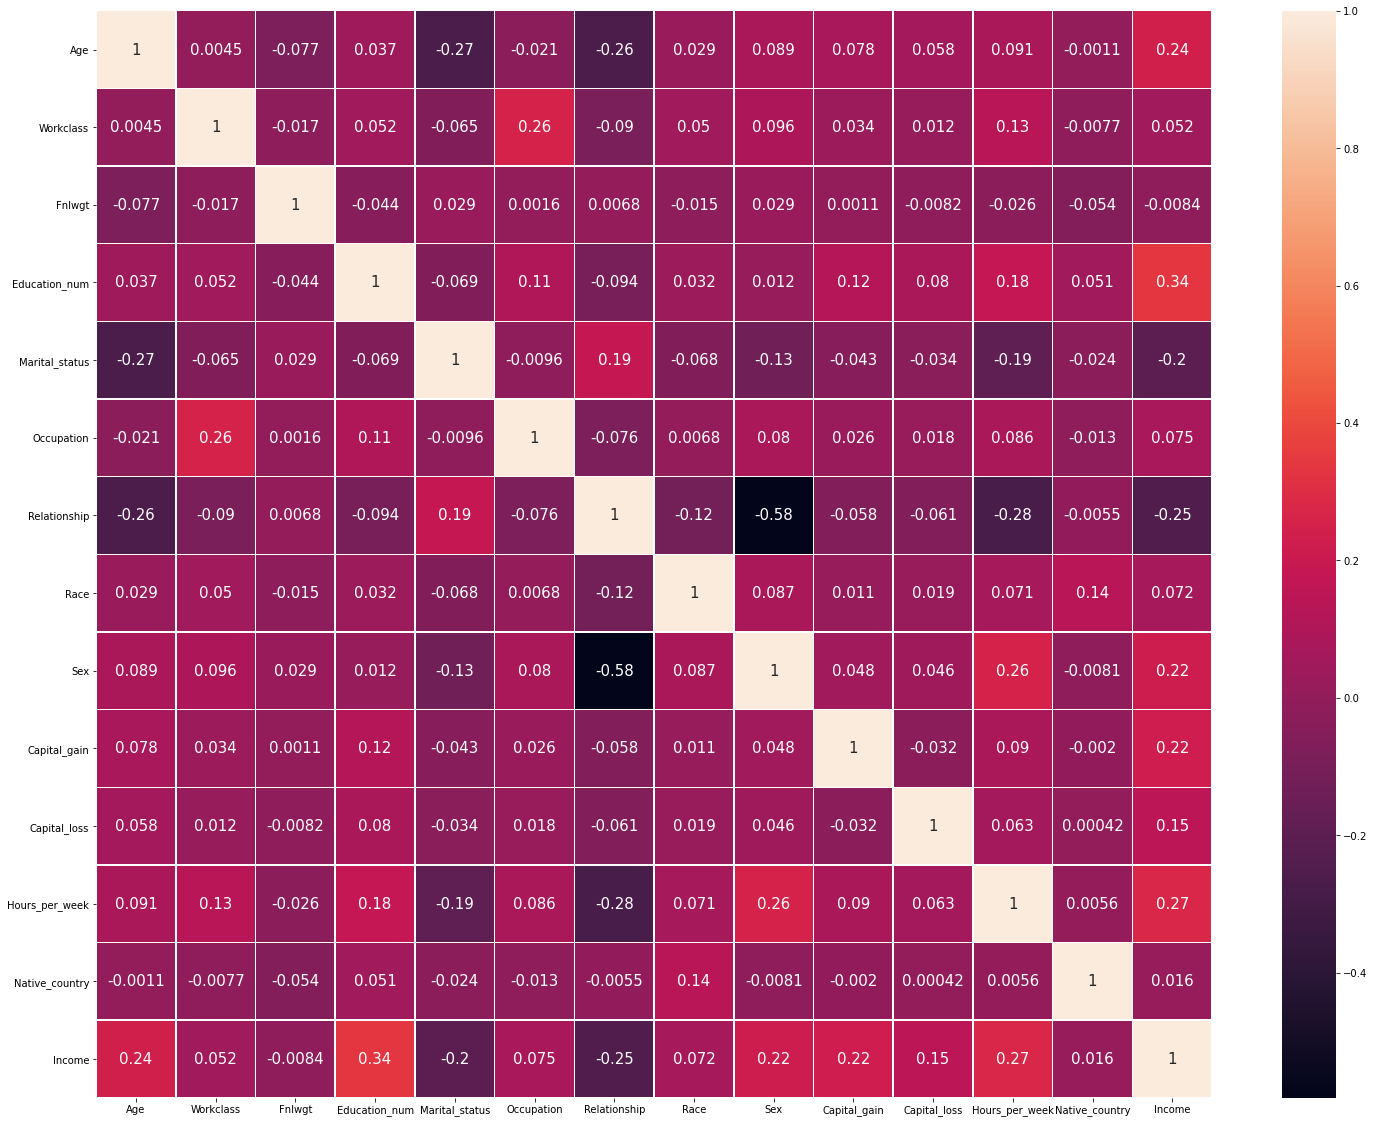

In [34]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

After analysing, the correlation between Income and features are high in columns "Age", "Education_num", Capital_gain, Hours per week , Sex. Therefore we'll eleminate columns with skewness or low colinearity or multicolinearity.

In [35]:
new_data.skew()

Age                0.513883
Workclass         -0.752280
Fnlwgt             0.548310
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.438274
Native_country    -3.658235
Income             1.212383
dtype: float64

In [36]:
#df_pca = df_pca.drop(["Capital_loss"],axis=1)
#df_pca

In [37]:
new_data = new_data.drop(["Race","Capital_gain","Capital_loss","Native_country"],axis=1)

## Balancing Classes using SMOTE

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

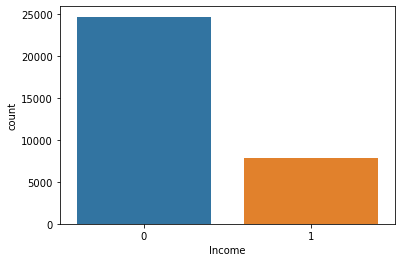

In [38]:
sns.countplot(new_data["Income"])

From the above diagram we can observe that we have a class imbalance in our target feature.

In [39]:
!pip install imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
X = new_data.drop("Income",axis=1)
y = new_data["Income"]

smt = SMOTE()
X,y = smt.fit_resample(X,y)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

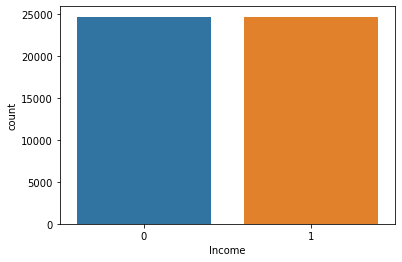

In [42]:
sns.countplot(y)

## Splitting dataset into training and testing sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=45)

## Model Learning to predict income category.

### KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [48]:
knn.score(X_test,y_test)

0.6884439050701187

In [49]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[4598, 2850],
       [1771, 5613]])

In [50]:
from sklearn.model_selection import KFold,cross_val_score

k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores_knn = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_knn

array([0.68325243, 0.6894822 , 0.68889069, 0.68889069])

In [51]:
print(np.mean(scores_knn),np.std(scores_knn))
knn_std = np.std(scores_knn)

0.68762900043232 0.0025383286904029257


### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred = DTC.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [57]:
DTC.score(X_test,y_test)

0.8245010787486515

In [58]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[6115, 1333],
       [1270, 6114]])

In [59]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
scores_dtc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=4))
scores_dtc

array([0.82572816, 0.81964925, 0.82765945])

In [60]:
print(np.mean(scores_dtc),np.std(scores_dtc))
dtc_std = np.std(scores_dtc)

0.8243456170852733 0.0034131475381609074


### GaussianNB Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [63]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [64]:
gnb.score(X_test,y_test)

0.7579557713052859

In [65]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[4727, 2721],
       [ 869, 6515]])

In [66]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = GaussianNB()
scores_gnb = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_gnb

array([0.76395631, 0.75702409, 0.75301899])

In [67]:
print(np.mean(scores_gnb),np.std(scores_gnb))
gnb_std = np.std(scores_gnb)

0.757999798606091 0.004518128546993365


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [70]:
y_pred=rfc.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [71]:
rfc.score(X_test,y_test)

0.863403451995685

In [72]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[6212, 1236],
       [ 790, 6594]])

In [73]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = RandomForestClassifier()
scores_rfc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_rfc

array([0.86957929, 0.86537217, 0.86519945, 0.86811231])

In [74]:
print(np.mean(scores_rfc),np.std(scores_rfc))
rfc_std = np.std(scores_rfc)

0.8670658032313231 0.001855023588930187


We can observe that out of the four models we will have the most accuracy in RandomForestClassifier().

# Using hyperparameters on Random Forest Classifier to improve accuracy

In [75]:
clf = RandomForestClassifier()

In [76]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
params_grid_rfc = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'random_state': [10, 20, 30, 40, 50],
 'n_estimators': [200, 400, 600, 800, 1000]}


Defining parameters for grid search cross validation to find the best hyperparameter values for the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc_grid = GridSearchCV(estimator=clf, param_grid=params_grid_rfc, cv=5)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_)

Running the grid search with model clf and hyperparameters with number of folds as 5 amd number of jobs = -1. 
We'll fit the model and using best_estimator_ function find the best combination of hyperparameters.

In [ ]:
rfc_final = RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                       random_state=50)

In [ ]:
import pickle

final_model1 = open('primary_fuel_prediction.csv', 'ab')     
pickle.dump(rfc_final, final_model1)                     
final_model1.close()  

### Saving the most efficient model in a pickle file 